In [302]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import sys
sys.path.insert(0, '/extenciones')
from extenciones import Utils2 as ut

# Carga de datos y copias de seguridad

Se hacen ajustes de Variables para dummies.

In [303]:

data = ut.load_from_csv( ut , "churn_exploratorio.csv")


In [304]:
dataEXP = data.copy(deep = True)

In [305]:
dataexp = dataEXP.drop(columns = ["Unnamed: 0"])

In [306]:
dataexp

,City,Tenure Months,Internet Service,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,...,Online Security_No internet service,Online Security_Yes,Online Backup_No internet service,Online Backup_Yes,Device Protection_No internet service,Device Protection_Yes,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes
0,Los Angeles,2,DSL,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,...,0,1,0,1,0,0,0,0,0,0
1,Los Angeles,2,Fiber optic,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,...,0,0,0,0,0,0,0,0,0,0
2,Los Angeles,8,Fiber optic,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1,...,0,0,0,0,0,1,0,0,0,1
3,Los Angeles,28,Fiber optic,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,...,0,0,0,0,0,1,0,1,0,1
4,Los Angeles,49,Fiber optic,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Landers,72,No,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,0,...,1,0,1,0,1,0,1,0,1,0
7039,Adelanto,24,DSL,Yes,One year,Yes,Mailed check,84.80,1990.5,0,...,0,1,0,0,0,1,0,1,0,1
7040,Amboy,72,Fiber optic,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0,...,0,0,0,1,0,1,0,0,0,1
7041,Angelus Oaks,11,DSL,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,...,0,1,0,0,0,0,0,0,0,0


In [307]:
dataexp = pd.get_dummies(dataexp ,columns = ["Contract","Paperless Billing","Internet Service", "Streaming Movies"] , drop_first= False)

# Analisis de correlación

C:\Users\DELL\AppData\Local\Temp\ipykernel_3700\3506525637.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataexp.corr()['Churn Value'].sort_values(ascending=True).plot(


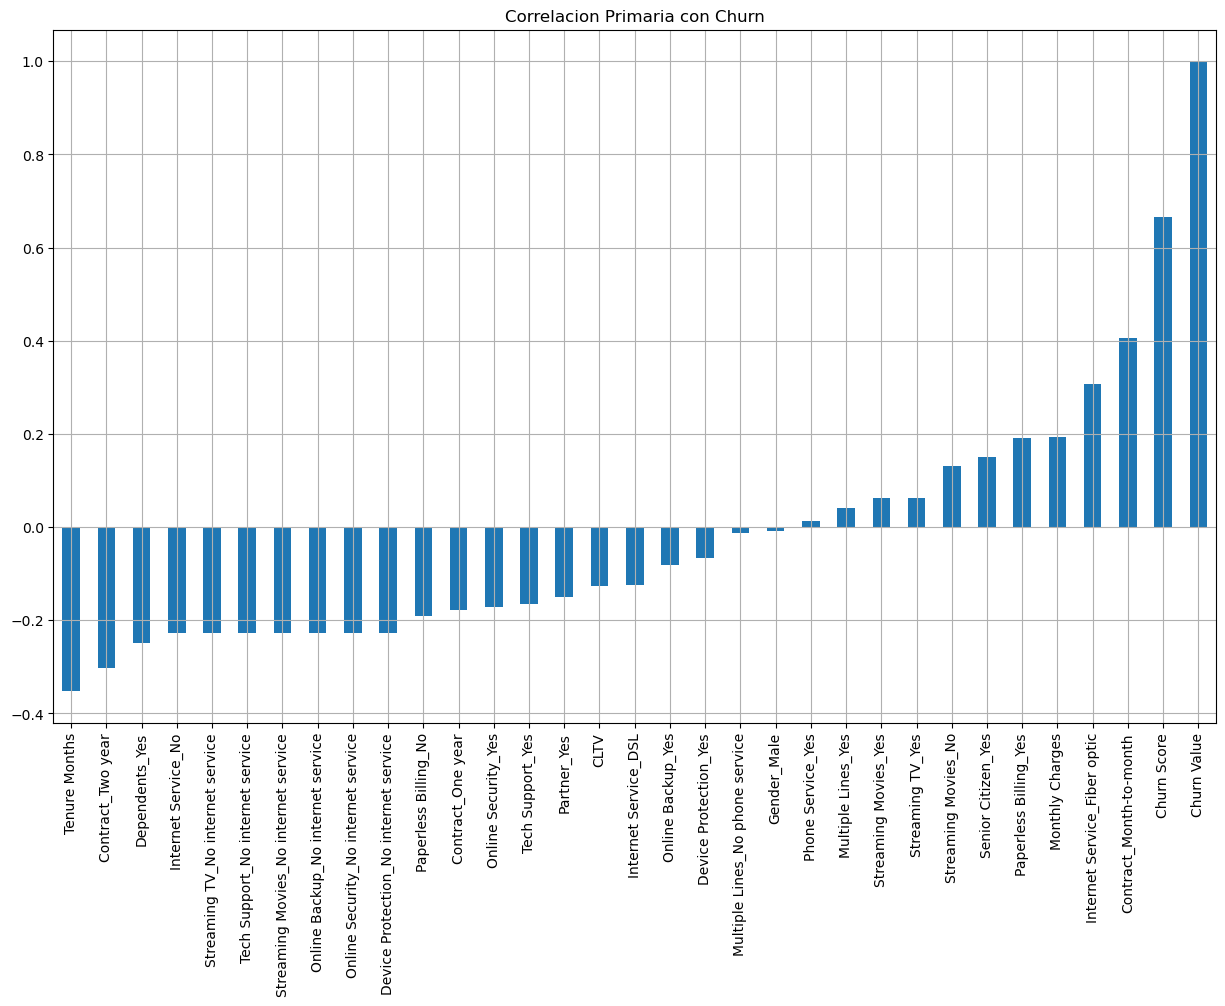

In [308]:
fig = plt.figure(figsize=(15,9))
# que tan correlacionados estan con el churn de manera asendente ordenada de tipo barra 
dataexp.corr()['Churn Value'].sort_values(ascending=True).plot(
    kind='bar',
    grid=True ,
    title= "Correlacion Primaria con Churn",
    #rot=True,

    )
plt.show()

# Correlaciones a primera vista:

Retencion:
    
    -Las variables relacionadas con altas niveles de tiempo estan negativamente correlacionads con el churn, o lo que es igual, positivamente corelacionads con la retencion de clientes: 
    tales como los contratos largos 
    
    -Tener dependientes: podemos analizar cual es el numero de dependientes clave para la retención
    
    -Las personas que no tienen servicio de Internet y que no tienen servicios extras - 
    
    -En general a las personas a las que no se les ha tenido que dar soporte tecnico


Churn
    
    -Las personas que contratan en plazos de mes a mes, tienen mayor posibilidad = .41
    
    -El servicio de fibra optica esta corelacionado negativamente .36
    
    -los cargos mensuales = .19
    
    -Asi como las personas que elijen facturar sin papel: podemos encontrar un causal detonante = .19
    
    -Si las personas tienen mas de 65 años = .17

# Analisis y ploteo de variables unicas 

Dividimos las variables para mejor vista:

    1.- Las que cargan rapido en funcionan visualmente en X
    
    2.- Las que cargan rapido y funcionan visualmente meojor en Y
    
    3.- Las variables mas densas 

In [309]:
lista_rapida = [
"Senior Citizen_Yes",
"Gender_Male",
"Dependents_Yes",
"Phone Service_Yes",
"Multiple Lines_Yes",
"Online Security_Yes",
"Online Backup_Yes",
"Tech Support_Yes",
"Streaming TV_Yes",
"Contract_One year",
"Contract_Two year",
"Paperless Billing_Yes",
"Internet Service_DSL",
"Internet Service_Fiber optic",
"Internet Service_No",
"Streaming Movies_Yes",
"Streaming Movies_No internet service",
]

In [310]:
plotvolteado = ["Churn Reason", "Payment Method", ]
lista_densa = ["Monthly Charges","Tenure Months", ]

Definimos las funciones e iteramos los plots mediante listas:

In [311]:
def plot_categorialX(column):
    fig = plt.figure(figsize=(5,5))
    
    sns.countplot(data=dataexp, x=column, hue='Churn Value',
    )
    plt.show()

In [312]:
def plot_categorialY(column):
    fig = plt.figure(figsize=(8,11))
    
    sns.countplot(data=dataexp, y=column, hue='Churn Value',
    palette="tab10"
    )
    plt.show()

In [313]:
def plot_categorialSpecial(column):
    fig = plt.figure(figsize=(50,10))
    
    sns.displot(data=dataexp, x=column, 
    #col='Churn Value', 
    #bins=120, 
    fill = True,
    #multiple="stack",
    hue= "Churn Value",
    kind="kde", 
    bw_adjust=.1
    )
    plt.plot(grid= True)
    plt.show()


Ploteamos las variables

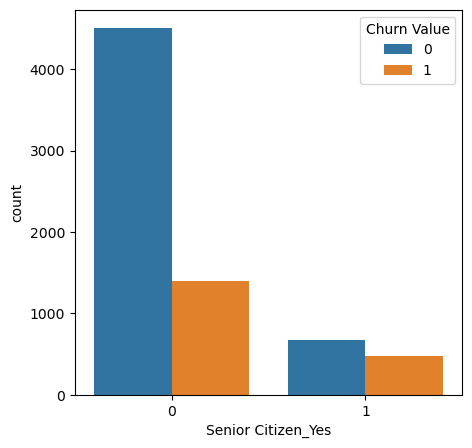

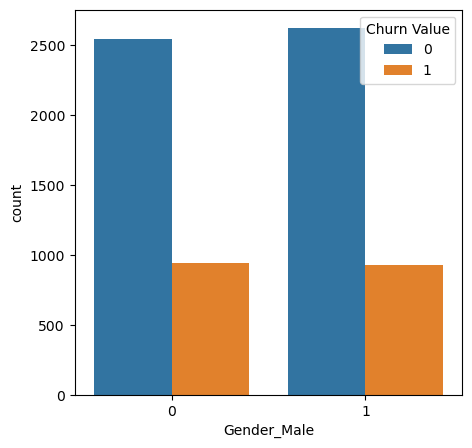

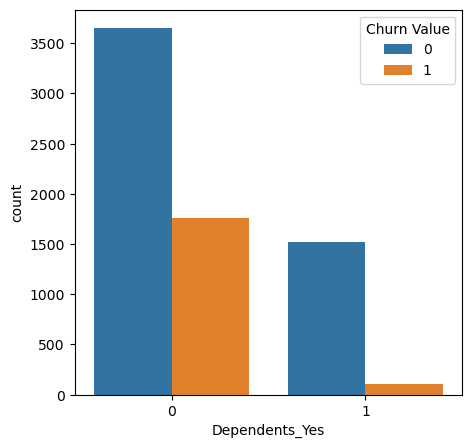

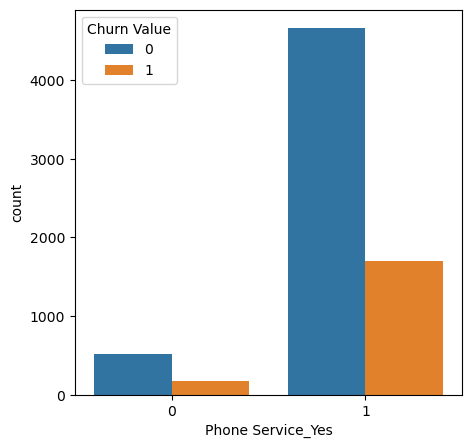

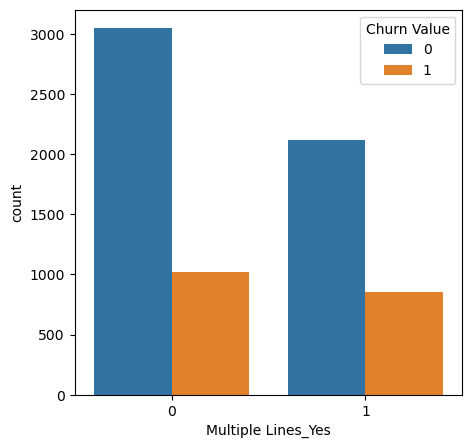

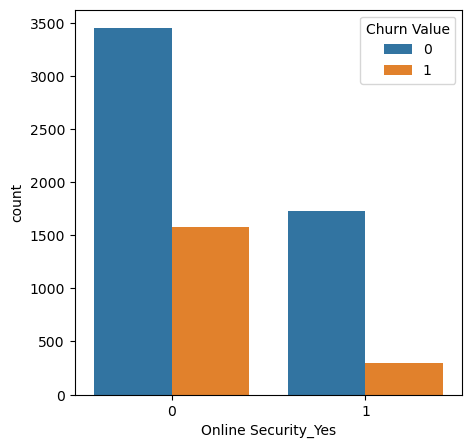

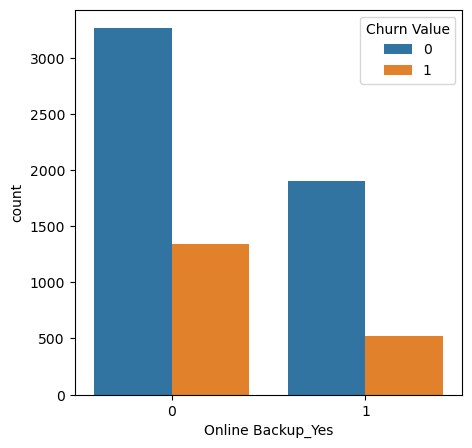

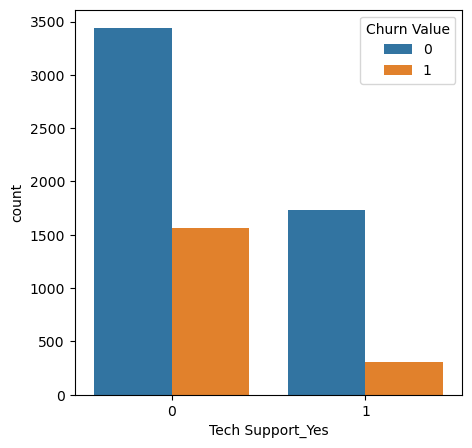

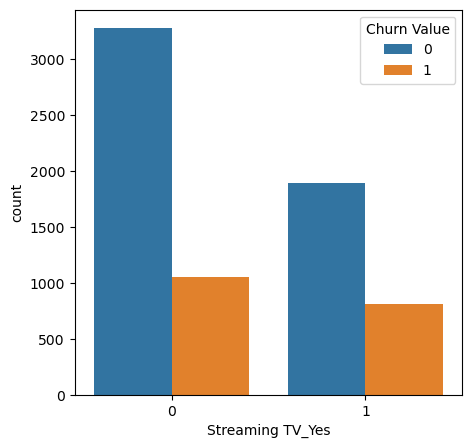

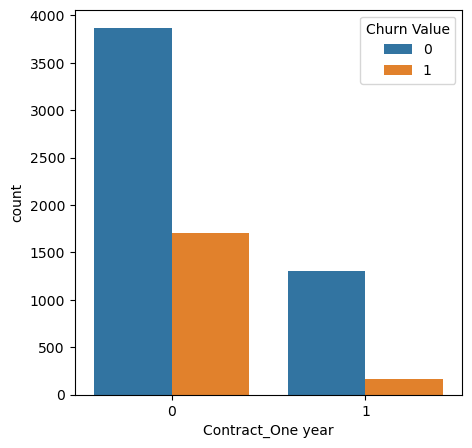

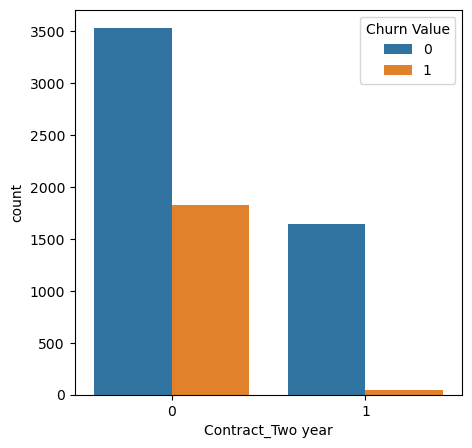

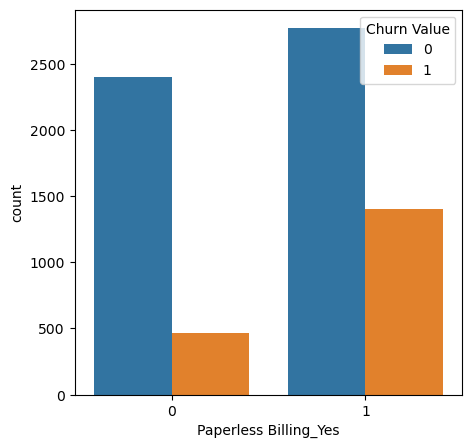

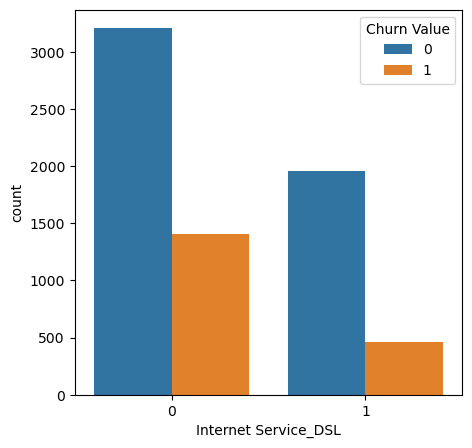

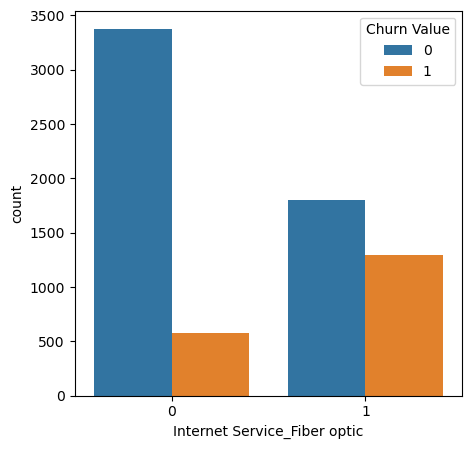

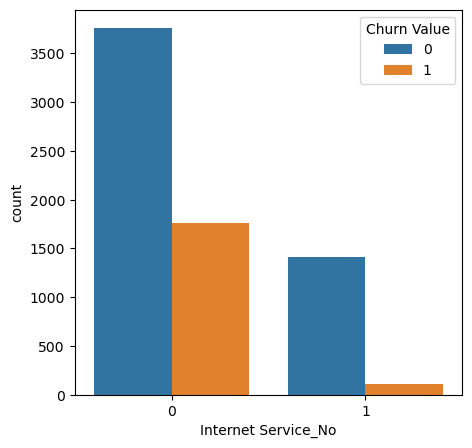

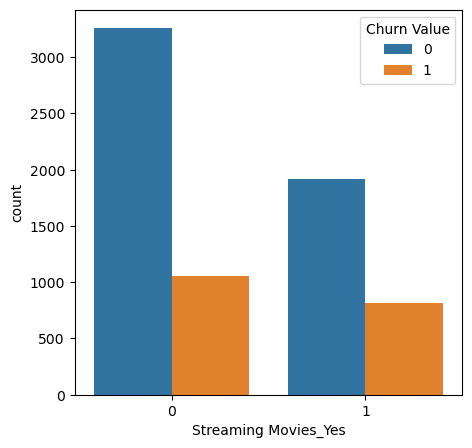

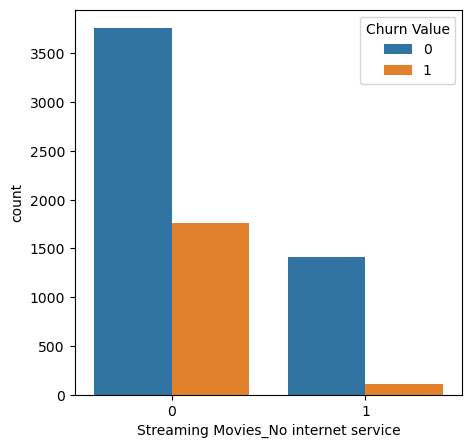

In [314]:
# guardamos las columnas categoricas con la funcion . select_dtypes en donde todas las que son de tipo objeto se guardaran
#columnas_categoricas = dataexp.select_dtypes(include='int64' ).columns
# pasale al parametro de la funcion las columnas iteradas  

#columnas_plot = ["Gender_Male"]
for var in lista_rapida:
    plot_categorialX(var)

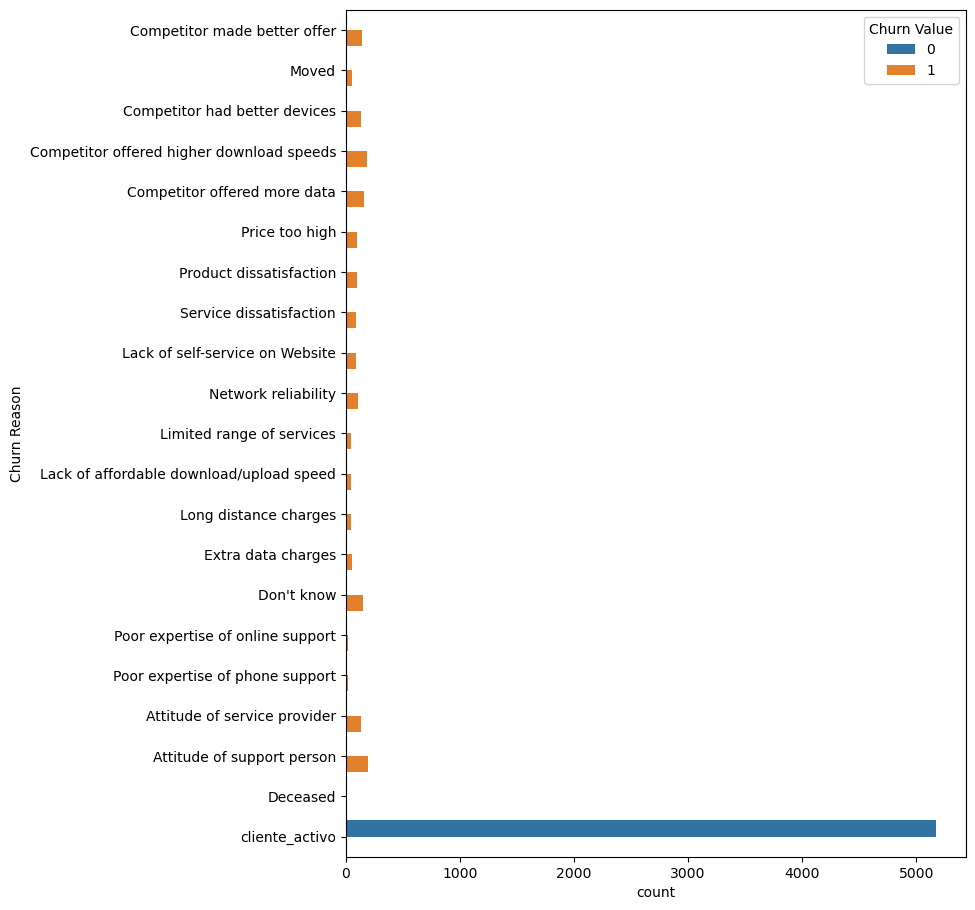

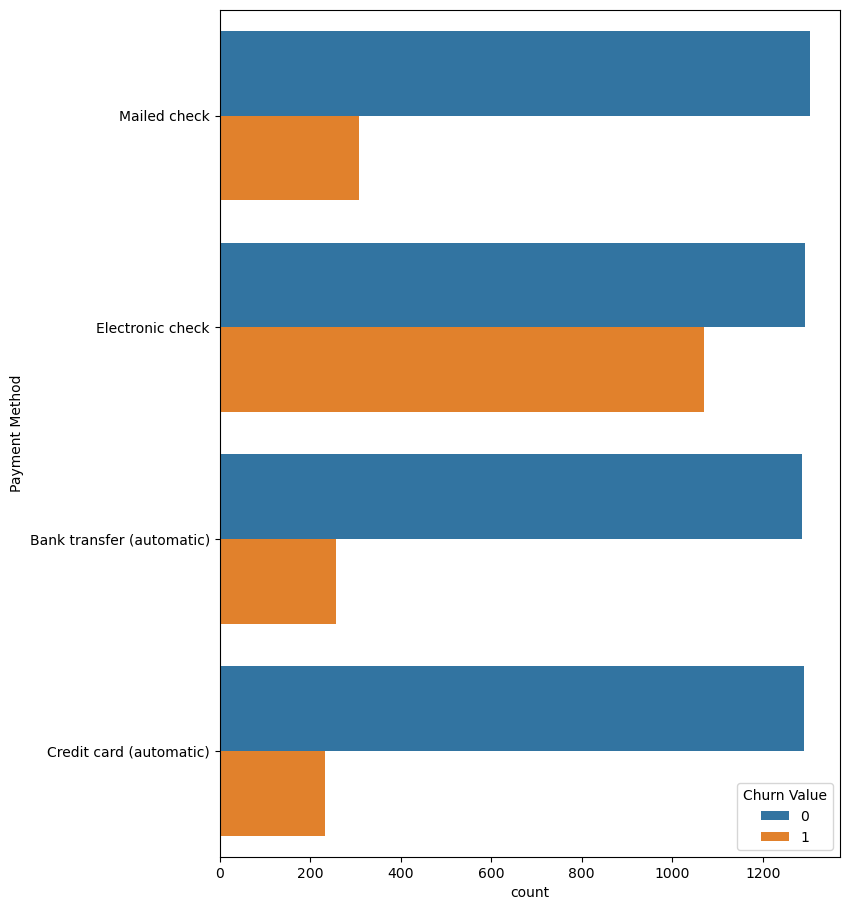

In [315]:
for var in plotvolteado:
    plot_categorialY(var)

<Figure size 5000x1000 with 0 Axes>

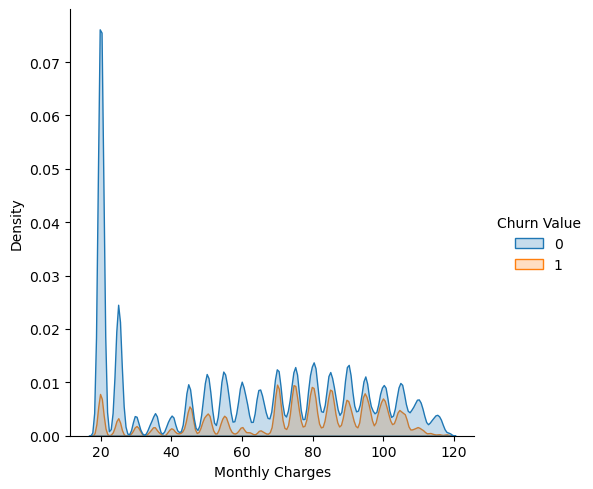

<Figure size 5000x1000 with 0 Axes>

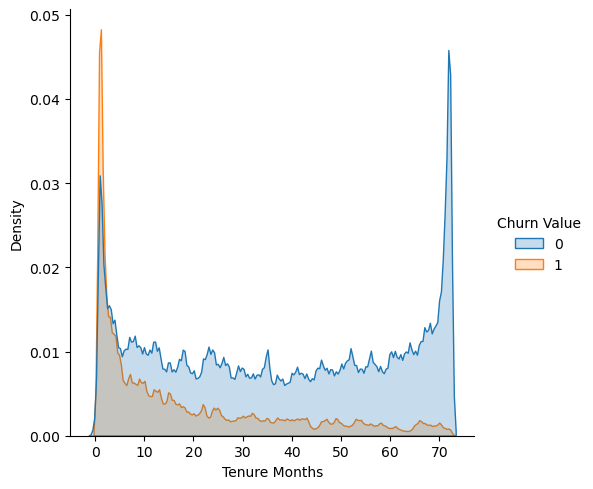

In [316]:

for var in lista_densa:
    plot_categorialSpecial(var)

# Analisis Churn 1.1.0

#**Razones por las cuales se retirarón:**
__PrimerNivel:__
(Critico)

    -Mejor oferta de la competencia, 
    -Mejor velocidad de descarga por parte del competidor 
    -Competencia ofrece mas datos 
    -Actitud de provedor de servicios
    -Actitud del personal de soporte.

__En segundo nivel estan:__ 
    
    -Precio alto 
    -Cambio de domicilio 
    -Insatisfaccion del producto y servicio
    -Lack of self-servicie on Website 
    -Netwok reliability.

__Y en tercer nivel:__

    -Cargos extra de datos 
    -Cargos de larga distancia 
    -Lack of affordable download speed 
    -Rango de servicios limitados.


## Categorias :

**Senior Citizen :** 
Las personas que no son mayores de 65 años tienen una tendencia a quedarse, en porcentaje

**Genero:**
El genero esta sumamente balanceado tanto de las personas que van como de las personas que se quedan, no es reelevante que sean hombres o mujeres.

**Dependientes :** 
Tenemos a muchoas mas clientes que no tienen dependientes, cerca del 30% pero nos deja el 45% de ellos, en cambio los clientes que si tienen dependientes son mas fieles, y tienen alrededor de un 5% de abandono.(Analisis profundo)

**Servicio de telefono:** 
Aunque tenemos mas clientes con servicio de telefono vemos que en % el churn es similar.

**Multiples lineas:** 
Clientes con multiples lineas son mas propensos a dejarnos.

**Seguridad Online:**
En % son mas las personas que no cuentan con seguridad online, y las personas que si lo tienen son mas propensas a seguir como clientes(Analisis profundo).

**Online Backup:** 
Similar a seguridad online aunque en menos medida.

**Soporte tecnico:** 
Son mas lo clientes que no lo solicitan, pero los que si lo hacen, tienden a dejarnos menos, una hipotesis es que no todos los clientes reportan las fallas, dado que en un acto normal, la grafica tendria que estar balanceada(Analizar cuales son las fallas que mas se reportan).

**Streming TV:** 
Las personas que utilizan el servicio de estreaming probablemente se quejen mas(posterior analisis con scaterplot junto con soporte tecnico ).

**Contratos por año y dos años:** 
Aunque pareseca obvio por ser dato trimestral, podemos analizar que tener contratos largos recurre en un mejor desempeño.

**Facturación sin papel :** 
Las personas que facturan sin papel tienden mas a irse, tendriamos que analizar si podemos controlar eso o a que se debe haciendo un analisis de campo cualitativo.

**DSL servicio de internet:** 
Vemos que la grafica esta medianamente balanceada aunque son varios clientes casi 1500

**Servicio de fibra optica :** 
Podemos ver que la cantidad de clientes que se fueron teniendo fibra optica es(tenemos que ver que esta pasando con el servicio de fibra optima, y ver si es que esta fallando)

**Personas que no tienen servicio de internet:** 
Las personas que no tienen este servicio, general se han quedado, lo que significa que las personas que si han tenido servicio de internet en general tienden a irse, (Revisar Fallas de fibra optica)

**Utilizan servicio de estreaming:** 
En % son menos las los clientes que lo usan pero de los que si, casi un 40% nos dejaron, (habria que ver la fibra optica)

**Streaming movies y no tienen servicio de internet:** 
Las personas sin servicio de internet(nuestro) pero que si ven peliculas en streaming, tienden a quedarse, en cambio las que si lo ven con nuestro servicio tienden a irse.


**El tipo de pago que nos esta ejando sin clientes es el cheque electronico.**

__Los cargos mensuales__ : 
Es normal que los cargos exesivos, alejen a las personas pero, aunque las distribuciones se mantienen normales dentro de un promedio , cuando los cargos pasan de 65 tenemos una alta tasa de churn, es importante ver los cargos y analizamos que el promedio de churn se dispara al doble cuando los cargos estan por encima de 65 dolares.

**Cantidad de meses**
Vemos que entre mas meses a permanecido con nosotros, mayor probabilidad tenenmos de que no nos deje, quiza independientemente de los cargos o las fallas de la empresa, osea la fidelidad.